In [2]:
from plotutil import periodictable
import pandas as pd
from mathutil import percentage, comp, constants
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
! pip install SciencePlots

In [3]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"

In [4]:
df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.fillna("", inplace=True)
cr_bro = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining - Chromyl\Results.xlsx")
df = pd.concat([df, cr_bro])
dataset = df.loc[(df["Type"] == "Corrole") & (df["Class"] != "Corrole")]# & (df["CoordNo"] == 4)]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "%"] = df[col].abs()/sum
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\comp.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + " comp"] = __compValue(df[col+"1"], df[col + "2"])
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

213

c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Subclass"] = dataframe.apply(
c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Heteroatom"] = df.apply(lambda x:
C:\Users\jenso\AppData\Local\Temp/ipykernel_11820/2629933325.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + metals)
C:\Users\j

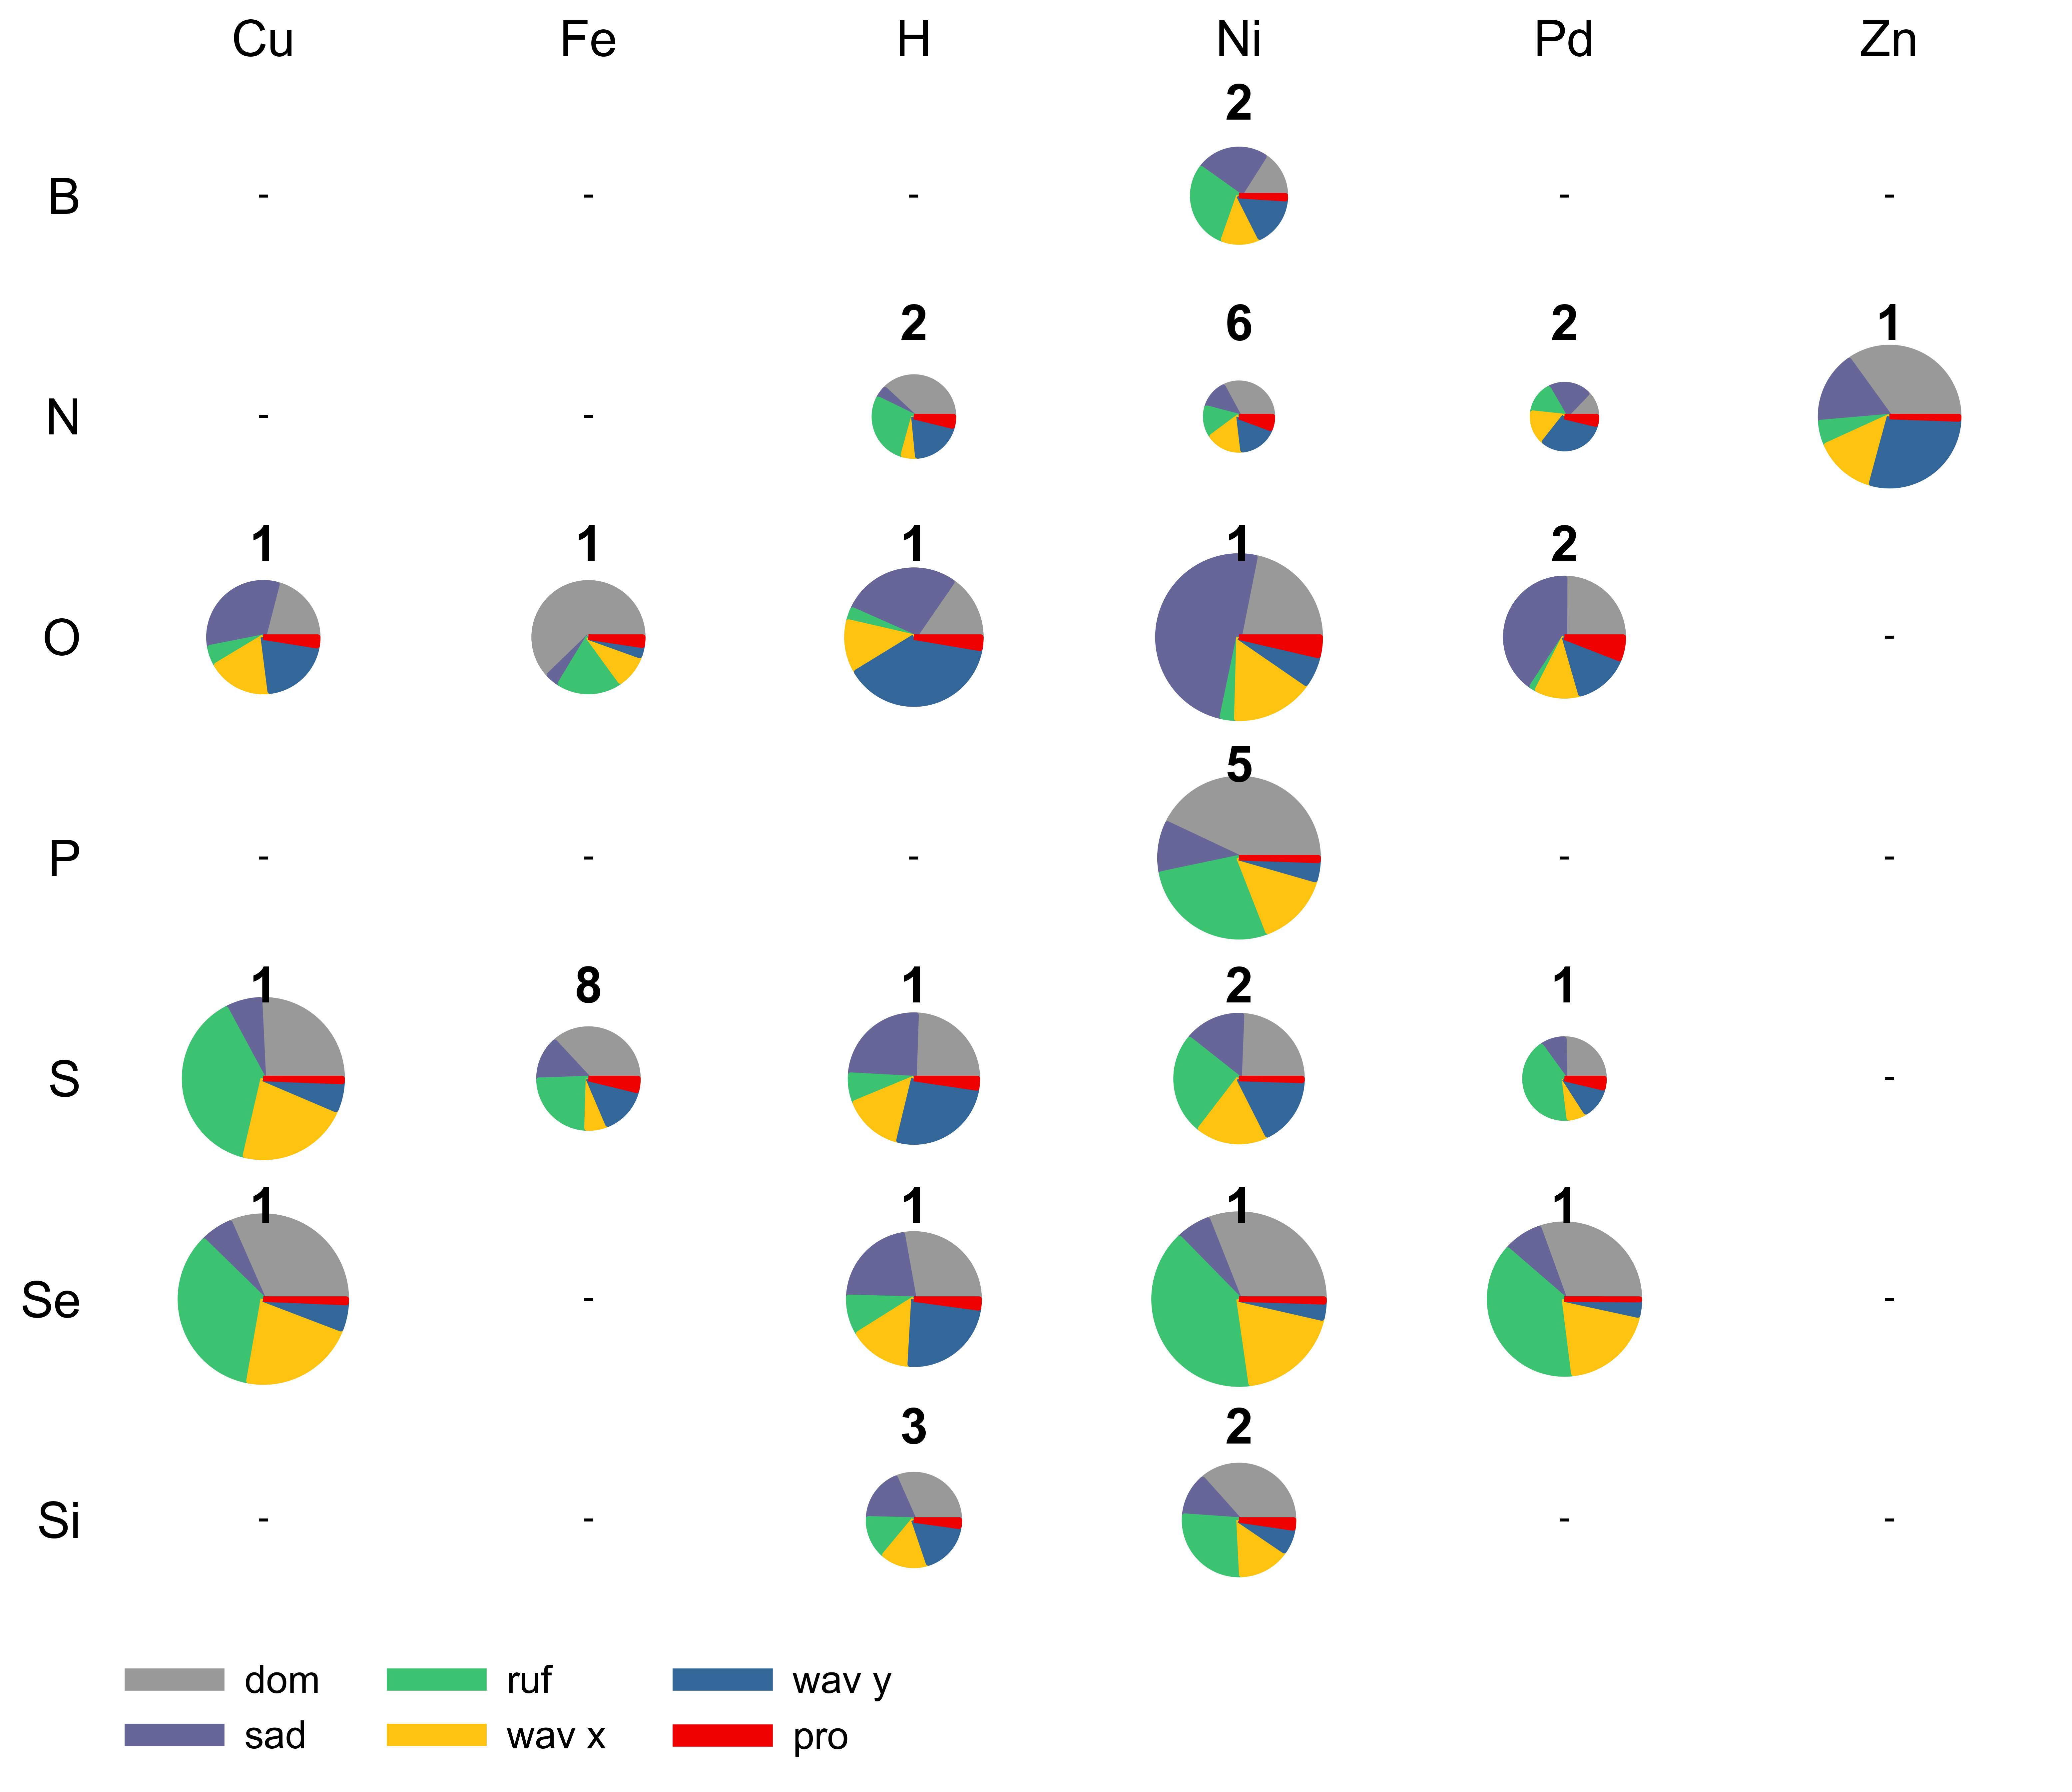

In [187]:
from data import datautil
from mathutil.analyze import groupBy
from matplotlib.lines import Line2D
from data.constants import colors_min, percCompColumns, percColumns, colors_ext
from plotutil.periodictable import draw_pie


data_hic = datautil.applyHICSubclass(dataset)
data_hic = datautil.getHeteroAtom(data_hic)
data_hic = data_hic.loc[data_hic["Subclass"] == "10-Heterocorrole"]

fig, ax = plt.subplots()
plt.box(False)
custom_lines = [Line2D([0], [0], color=colors_min[0], lw=4),
                  Line2D([0], [0], color=colors_min[1], lw=4),
                    Line2D([0], [0], color=colors_min[2], lw=4),
                    Line2D([0], [0], color=colors_min[3], lw=4),
                    Line2D([0], [0], color=colors_min[4], lw=4),
                    Line2D([0], [0], color=colors_min[5], lw=4)]
# custom_lines += [Line2D([0], [0], color=colors_ext[0], lw=4),
#                          Line2D([0], [0], color=colors_ext[1], lw=4),
#                          Line2D([0], [0], color=colors_ext[2], lw=4),
#                          Line2D([0], [0], color=colors_ext[3], lw=4),
#                          Line2D([0], [0], color=colors_ext[4], lw=4),
#                          Line2D([0], [0], color=colors_ext[5], lw=4)]
items = ['dom', 'sad', 'ruf', 'wav x', 'wav y', 'pro']
# items += ['dom2', 'sad2', 'ruf2', 'wav x2', 'wav y2', 'pro2']

legend = plt.legend(
        custom_lines, items, frameon=1, loc=2, ncol=3, bbox_to_anchor=(.0, .0),
    )
frame = legend.get_frame()
frame.set_color('white')
ax.minorticks_off()
ax.xaxis.tick_top()
ax.tick_params(axis='both', which='both', length=0)

heteroatoms = groupBy(data_hic, constants.percColumns, "Heteroatom").index.tolist()
# heteroatoms.sort(key)
metals = groupBy(data_hic, constants.percColumns, "Metal").index.tolist()
ax.set_xticklabels([""] + metals)
ax.set_yticklabels([""] + heteroatoms)
ax.set(xlim=(-.5, len(heteroatoms)-1.5), ylim=(len(metals)+.5, -.5))
columns = constants.percCompColumns
for h in heteroatoms:
    subframe = data_hic.loc[data_hic["Heteroatom"] == h]
    subgroup = groupBy(subframe, columns, "Metal")
    for m in metals:
        pos_x = metals.index(m)
        pos_y = heteroatoms.index(h)
        res = subgroup.query("Metal == @m")
        if res.size == 0:
            plt.text(pos_x, pos_y, "-", horizontalalignment="center", verticalalignment="center", fontsize=6)
            continue
        list = []
        for mode in columns:
            if "Doop" in m: continue
            list.append(res[mode].values[0])
        draw_pie(pos_x, pos_y, list, res["DoopExp"]*1000, constants.colors_min, ax)        
        s = res["structures"].values[0]
        plt.text(pos_x, pos_y-.3, s, horizontalalignment="center", verticalalignment="bottom", fontweight="bold", fontsize=9)